# Final Project

## Choosing a Dataset

I love Formula 1, so I wanted to do something using Formula 1 data. 


**What is Formula 1?**

<p>Formula 1 is an open-wheeled, single seater motorsport that has been aorund since 1950!!</p>
    <p>There are <b>10 teams</b> in total and each team has <b>2 drivers</b>.</p>
    <p>Each year there is one racing season, which consists of <b>21 races</b> all over the world. </p>
    <p>The results of each race are evaluated using a points system to determine <b>two annual World Championships:</b> one for drivers, the other for constructors.</p>
    

<p style="float: left; font-size: 9pt; text-align: center; width: 40%; margin-right: 1%; margin-bottom: 0.5em;"><img src="pictures/formula1_car_evolution.jpg" style="width: 100%">Evolution of Formula 1 cars</p>


<p style="float: left; font-size: 9pt; text-align: center; width: 40%; margin-right: 1%; margin-bottom: 0.5em;"><img src="pictures/formula1_car.jpg" style="width: 100%">Formula 1 cars</p>
<p style="float: left; font-size: 9pt; text-align: center; width: 40%; margin-left: 1%; margin-bottom: 0.5em;"><img src="pictures/charles_leclerc.jpg" style="width: 95%">My favourite driver</p>

<p style="float: left; font-size: 9pt; text-align: center; width: 40%; margin-left: 1%; margin-bottom: 0.5em;"><img src="pictures/formula1_tracks.jpg" style="width: 100%">Formula 1 Tracks</p>

<p style="float: left; font-size: 9pt; text-align: center; width: 50%; margin-right: 1%; margin-left: 3%; margin-bottom: 0.5em;"><img src="pictures/charles_leclerc_wins.jpeg" align="absbottom"; style="width: 100%" >Charles winning :) </p>

First, let's import any libraries we may need. 

In [110]:
# importing useful python libraries 

import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap, catplot, barplot
import glob
import statsmodels.formula.api as smf 
import plotly.express as px
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<p> The dataset that I will be using is courtesy of <b>Vopani on Kaggle</b>! </p>

https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

<p> The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest ended 2019 season and also the scheduled 2020 season. </p>

<p>Here is a list of all the files provided in this dataset:</p>

In [111]:
datafiles = glob.glob('data/*.csv')
datafiles

['data/circuits.csv',
 'data/status.csv',
 'data/drivers.csv',
 'data/races.csv',
 'data/constructors.csv',
 'data/constructor_standings.csv',
 'data/qualifying.csv',
 'data/driver_standings.csv',
 'data/constructor_results.csv',
 'data/pit_stops.csv',
 'data/seasons.csv',
 'data/qualifying_copy.csv',
 'data/results.csv']

## Let's observe the data set

<p> The most useful file is likely the "results" file.</p>

In [112]:
# upload and observe the results file

results = pd.read_csv('data/results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [113]:
# let's see what information we get in the drivers file 

drivers = pd.read_csv('data/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [114]:
driver_standings = pd.read_csv('data/driver_standings.csv')
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [115]:
constructors = pd.read_csv('data/constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [116]:
constructor_standings = pd.read_csv('data/constructor_standings.csv')
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [117]:
constructor_results = pd.read_csv('data/constructor_results.csv')
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [118]:
# left-join; this time we want all the data from df_master

most_points = pd.merge(constructor_results,       # the "left" dataframe
         constructors,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = 'constructorId'  # the join key
                      )

sum_points= most_points.groupby('name').sum()
sum_points.reset_index(level=0, inplace=True)
sum_points = sum_points.loc[sum_points['points']!=0]



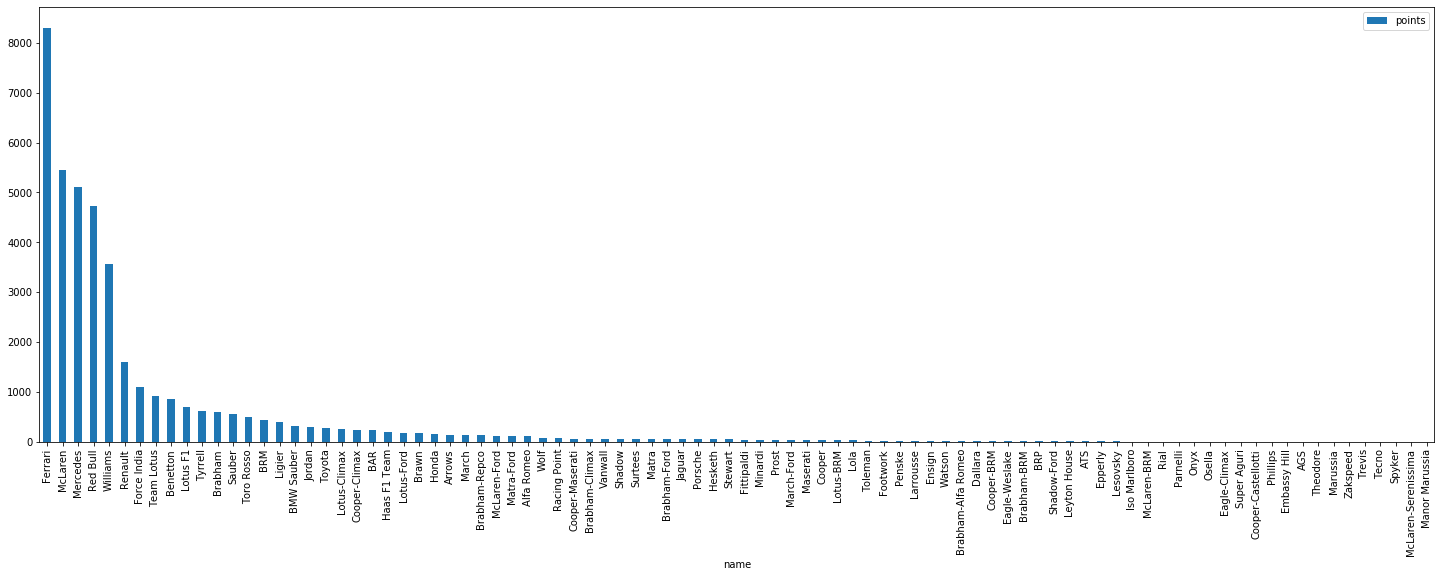

In [119]:
sum_points.sort_values(by='points',ascending=False).plot.bar(x ='name' , y = 'points', figsize = (25,8))

In [121]:
qualifying = pd.read_csv('data/qualifying.csv')
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [122]:
races = pd.read_csv('data/races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


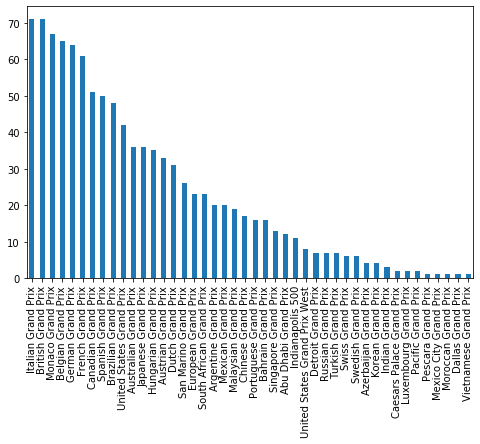

In [123]:
total_occurences = races['name'].value_counts()
total_occurences.plot.bar(figsize=(8,5))

In [124]:
circuits = pd.read_csv('data/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [125]:
seasons = pd.read_csv('data/seasons.csv')
seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


In [126]:
status = pd.read_csv('data/status.csv')
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
130,133,+49 Laps
131,134,+38 Laps
132,135,Brake duct
133,136,Seat


In [127]:
pit_stops = pd.read_csv('data/pit_stops.csv')
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


## Decide what data to use

**Ordinal Variables**
1. Finish Position (results['positionOrder'])
2. Grid Position (results['grid'])

**Categorical Variables**
1. Race Status (status['status'])

In Formula1, weather and tyre choice are big factors in a race, but I don't have that data... so already this model will not be very accurate, but for project purposes we will continue :(

**Numerical Variables**
1. Pit Stops (pit_stops['time'])

### Are we gonna use all the data? 

The sport has changed a lot, as you saw in the evolution of Formula1 cars picture. The rules, drivers, races, tracks, and constructors also change a lot, so we will stick to the last 4 seasons, as it is the most consistent we can be with the data. Also, we will only use the tracks that have remained consistent in the last 4 seasons. 

## Cleaning and Combining the Data

Start by only choosing the last 4 seasons.

In [128]:
df_races = races.copy()

In [129]:
df_races = df_races.loc[(df_races['year']>=2016)&(df_races['year']!=2020)]
df_races

,raceId,year,round,circuitId,name,date,time,url
935,948,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...
936,949,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,https://en.wikipedia.org/wiki/2016_Bahrain_Gra...
937,950,2016,3,17,Chinese Grand Prix,2016-04-17,06:00:00,https://en.wikipedia.org/wiki/2016_Chinese_Gra...
938,951,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,https://en.wikipedia.org/wiki/2016_Russian_Gra...
939,952,2016,5,4,Spanish Grand Prix,2016-05-15,12:00:00,https://en.wikipedia.org/wiki/2016_Spanish_Gra...
...,...,...,...,...,...,...,...,...
1013,1026,2019,17,22,Japanese Grand Prix,2019-10-13,05:10:00,https://en.wikipedia.org/wiki/2019_Japanese_Gr...
1014,1027,2019,18,32,Mexican Grand Prix,2019-10-27,19:10:00,https://en.wikipedia.org/wiki/2019_Mexican_Gra...
1015,1028,2019,19,69,United States Grand Prix,2019-11-03,19:10:00,https://en.wikipedia.org/wiki/2019_United_Stat...
1016,1029,2019,20,18,Brazilian Grand Prix,2019-11-17,17:10:00,https://en.wikipedia.org/wiki/2019_Brazilian_G...


Now, we only want to choose the races that have remained consistent for the 4 years.

In [130]:
df_races['name'].value_counts()

Hungarian Grand Prix        4
Mexican Grand Prix          4
Italian Grand Prix          4
Australian Grand Prix       4
Spanish Grand Prix          4
British Grand Prix          4
Brazilian Grand Prix        4
Canadian Grand Prix         4
Russian Grand Prix          4
Chinese Grand Prix          4
Monaco Grand Prix           4
Bahrain Grand Prix          4
United States Grand Prix    4
Abu Dhabi Grand Prix        4
Singapore Grand Prix        4
Austrian Grand Prix         4
Japanese Grand Prix         4
Belgian Grand Prix          4
German Grand Prix           3
Azerbaijan Grand Prix       3
Malaysian Grand Prix        2
French Grand Prix           2
European Grand Prix         1
Name: name, dtype: int64

We need to remove all the races that have less than 4. 

In [131]:
df_races = df_races[df_races['name']!='Azerbaijan Grand Prix']
df_races = df_races[df_races['name']!='Mexican Grand Prix']
df_races = df_races[df_races['name']!='French Grand Prix']
df_races = df_races[df_races['name']!='German Grand Prix']
df_races = df_races[df_races['name']!='Malaysian Grand Prix']
df_races = df_races[df_races['name']!='Mexico City Grand Prix']
df_races = df_races[df_races['name']!='European Grand Prix']
df_races = df_races[df_races['name']!='Vietnamese Grand Prix']
df_races = df_races[df_races['name']!='Dutch Grand Prix']

In [132]:
df_races

,raceId,year,round,circuitId,name,date,time,url
935,948,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...
936,949,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,https://en.wikipedia.org/wiki/2016_Bahrain_Gra...
937,950,2016,3,17,Chinese Grand Prix,2016-04-17,06:00:00,https://en.wikipedia.org/wiki/2016_Chinese_Gra...
938,951,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,https://en.wikipedia.org/wiki/2016_Russian_Gra...
939,952,2016,5,4,Spanish Grand Prix,2016-05-15,12:00:00,https://en.wikipedia.org/wiki/2016_Spanish_Gra...
...,...,...,...,...,...,...,...,...
1012,1025,2019,16,71,Russian Grand Prix,2019-09-29,11:10:00,https://en.wikipedia.org/wiki/2019_Russian_Gra...
1013,1026,2019,17,22,Japanese Grand Prix,2019-10-13,05:10:00,https://en.wikipedia.org/wiki/2019_Japanese_Gr...
1015,1028,2019,19,69,United States Grand Prix,2019-11-03,19:10:00,https://en.wikipedia.org/wiki/2019_United_Stat...
1016,1029,2019,20,18,Brazilian Grand Prix,2019-11-17,17:10:00,https://en.wikipedia.org/wiki/2019_Brazilian_G...


Some of these may still be different circuits in the same place so we have to check with the circuits df.

In [133]:
df_circuits = circuits.copy()
df_circuits = df_circuits.loc[:,['circuitId','circuitRef']]
df_circuits.head()

,circuitId,circuitRef
0,1,albert_park
1,2,sepang
2,3,bahrain
3,4,catalunya
4,5,istanbul


Left-join to combine the two data frames. 

**Note:** I only want the data that matches with my races df. 

In [134]:
# left-join 
df_races = pd.merge(df_races,       # the "left" dataframe
         df_circuits,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = 'circuitId'  # the join key
        )
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,circuitRef
0,948,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...,albert_park
1,949,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,https://en.wikipedia.org/wiki/2016_Bahrain_Gra...,bahrain
2,950,2016,3,17,Chinese Grand Prix,2016-04-17,06:00:00,https://en.wikipedia.org/wiki/2016_Chinese_Gra...,shanghai
3,951,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,https://en.wikipedia.org/wiki/2016_Russian_Gra...,sochi
4,952,2016,5,4,Spanish Grand Prix,2016-05-15,12:00:00,https://en.wikipedia.org/wiki/2016_Spanish_Gra...,catalunya


We need to remove all the races that have less than 4. 

In [135]:
df_races['circuitRef'].value_counts()

suzuka           4
hungaroring      4
villeneuve       4
albert_park      4
spa              4
bahrain          4
shanghai         4
americas         4
sochi            4
monza            4
yas_marina       4
marina_bay       4
silverstone      4
interlagos       4
red_bull_ring    4
monaco           4
catalunya        4
Name: circuitRef, dtype: int64

Yay, all of them are unique Grand Prix's, so I'm just gonna go ahead and remove the unneccessary data from the races dataframe.

In [136]:
del df_races['date']
del df_races['url']
del df_races['circuitRef']

In [137]:
df_races

,raceId,year,round,circuitId,name,time
0,948,2016,1,1,Australian Grand Prix,05:00:00
1,949,2016,2,3,Bahrain Grand Prix,15:00:00
2,950,2016,3,17,Chinese Grand Prix,06:00:00
3,951,2016,4,71,Russian Grand Prix,12:00:00
4,952,2016,5,4,Spanish Grand Prix,12:00:00
...,...,...,...,...,...,...
63,1025,2019,16,71,Russian Grand Prix,11:10:00
64,1026,2019,17,22,Japanese Grand Prix,05:10:00
65,1028,2019,19,69,United States Grand Prix,19:10:00
66,1029,2019,20,18,Brazilian Grand Prix,17:10:00


**Start combining data into the master dataframe, "results"**

In [138]:
df_master = results.copy()
df_master.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [139]:
# first, delete any "useless" columns from master_results

del df_master['positionText']
del df_master['position']
del df_master['number']
del df_master['fastestLap']
del df_master['rank']
del df_master['time']
del df_master['milliseconds']
del df_master['laps']
del df_master['fastestLapTime']
del df_master['fastestLapSpeed']

In [140]:
df_master.head()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,statusId
0,1,18,1,1,1,1,10.0,1
1,2,18,2,2,5,2,8.0,1
2,3,18,3,3,7,3,6.0,1
3,4,18,4,4,11,4,5.0,1
4,5,18,5,1,3,5,4.0,1


**Combining master and races dataframes.**

**Note:** I only need the data in the races df. 

In [141]:
# left-join 
df_master = pd.merge(df_races,       # the "left" dataframe
         df_master,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = 'raceId'  # the join key
        )
df_master

,raceId,year,round,circuitId,name,time,resultId,driverId,constructorId,grid,positionOrder,points,statusId
0,948,2016,1,1,Australian Grand Prix,05:00:00,22917,3,131,2,1,25.0,1
1,948,2016,1,1,Australian Grand Prix,05:00:00,22918,1,131,1,2,18.0,1
2,948,2016,1,1,Australian Grand Prix,05:00:00,22919,20,6,3,3,15.0,1
3,948,2016,1,1,Australian Grand Prix,05:00:00,22920,817,9,8,4,12.0,1
4,948,2016,1,1,Australian Grand Prix,05:00:00,22921,13,3,6,5,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1030,2019,21,24,Abu Dhabi Grand Prix,13:10:00,24621,841,51,16,16,0.0,11
1390,1030,2019,21,24,Abu Dhabi Grand Prix,13:10:00,24622,847,3,18,17,0.0,11
1391,1030,2019,21,24,Abu Dhabi Grand Prix,13:10:00,24623,842,5,11,18,0.0,12
1392,1030,2019,21,24,Abu Dhabi Grand Prix,13:10:00,24624,9,3,19,19,0.0,12


**Combining master and drivers/constructors dataframes**

In [142]:
df_drivers = drivers.copy()

In [143]:
# select only the columns I need from drivers
df_drivers = df_drivers.loc[:,['driverId','driverRef']]

In [144]:
# left-join; this time we want all the data from df_master

df_master = pd.merge(df_master,       # the "left" dataframe
         df_drivers,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = 'driverId'  # the join key
        )
df_master.head()

,raceId,year,round,circuitId,name,time,resultId,driverId,constructorId,grid,positionOrder,points,statusId,driverRef
0,948,2016,1,1,Australian Grand Prix,05:00:00,22917,3,131,2,1,25.0,1,rosberg
1,948,2016,1,1,Australian Grand Prix,05:00:00,22918,1,131,1,2,18.0,1,hamilton
2,948,2016,1,1,Australian Grand Prix,05:00:00,22919,20,6,3,3,15.0,1,vettel
3,948,2016,1,1,Australian Grand Prix,05:00:00,22920,817,9,8,4,12.0,1,ricciardo
4,948,2016,1,1,Australian Grand Prix,05:00:00,22921,13,3,6,5,10.0,1,massa


In [145]:
# same thing for constructors 
df_constructors = constructors.copy()

In [146]:
# select only the columns I need from constructors
df_constructors = df_constructors.loc[:,['constructorId','constructorRef']]

In [147]:
# left-join;we want all the data from df_master

df_master = pd.merge(df_master,       # the "left" dataframe
         df_constructors,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = 'constructorId'  # the join key
        )
df_master.head()

,raceId,year,round,circuitId,name,time,resultId,driverId,constructorId,grid,positionOrder,points,statusId,driverRef,constructorRef
0,948,2016,1,1,Australian Grand Prix,05:00:00,22917,3,131,2,1,25.0,1,rosberg,mercedes
1,948,2016,1,1,Australian Grand Prix,05:00:00,22918,1,131,1,2,18.0,1,hamilton,mercedes
2,948,2016,1,1,Australian Grand Prix,05:00:00,22919,20,6,3,3,15.0,1,vettel,ferrari
3,948,2016,1,1,Australian Grand Prix,05:00:00,22920,817,9,8,4,12.0,1,ricciardo,red_bull
4,948,2016,1,1,Australian Grand Prix,05:00:00,22921,13,3,6,5,10.0,1,massa,williams


**Let's look at the status dataframe**

I was looking into a lot of other projects using this same dataset and they chose to just do finished and not finished. This version would simplify things a lot for me so I will do it.

I will assign it a binary value. Driver Finished? True= 1, False = 0

In [148]:
df_status = status.copy()

In [149]:
df_status['Finished'] = np.where(df_status['statusId']==1,1,0)
df_status.head()

,statusId,status,Finished
0,1,Finished,1
1,2,Disqualified,0
2,3,Accident,0
3,4,Collision,0
4,5,Engine,0


In [150]:
del df_status['status']

**Combining master and status dataframes**

In [151]:
# left-join; this time we want all the data from df_master

df_master = pd.merge(df_master,       # the "left" dataframe
         df_status,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = 'statusId'  # the join key
        )
df_master.head()

,raceId,year,round,circuitId,name,time,resultId,driverId,constructorId,grid,positionOrder,points,statusId,driverRef,constructorRef,Finished
0,948,2016,1,1,Australian Grand Prix,05:00:00,22917,3,131,2,1,25.0,1,rosberg,mercedes,1
1,948,2016,1,1,Australian Grand Prix,05:00:00,22918,1,131,1,2,18.0,1,hamilton,mercedes,1
2,948,2016,1,1,Australian Grand Prix,05:00:00,22919,20,6,3,3,15.0,1,vettel,ferrari,1
3,948,2016,1,1,Australian Grand Prix,05:00:00,22920,817,9,8,4,12.0,1,ricciardo,red_bull,1
4,948,2016,1,1,Australian Grand Prix,05:00:00,22921,13,3,6,5,10.0,1,massa,williams,1


In [152]:
# deleting not useful columns 
del df_master['round']
del df_master['statusId']
del df_master['resultId']

Now let's split the winners from the losers. Here is how the points system works in F1: 

<p style="float: left; font-size: 9pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="pictures/formula1_points.jpeg" style="width: 100%">Formula 1 Point System</p>


We will create a binary value again for "podium" finishes and "4-10" finishes

In [153]:
df_master['podium'] = np.where(df_master['points']>=15,1,0)
df_master.head()

,raceId,year,circuitId,name,time,driverId,constructorId,grid,positionOrder,points,driverRef,constructorRef,Finished,podium
0,948,2016,1,Australian Grand Prix,05:00:00,3,131,2,1,25.0,rosberg,mercedes,1,1
1,948,2016,1,Australian Grand Prix,05:00:00,1,131,1,2,18.0,hamilton,mercedes,1,1
2,948,2016,1,Australian Grand Prix,05:00:00,20,6,3,3,15.0,vettel,ferrari,1,1
3,948,2016,1,Australian Grand Prix,05:00:00,817,9,8,4,12.0,ricciardo,red_bull,1,0
4,948,2016,1,Australian Grand Prix,05:00:00,13,3,6,5,10.0,massa,williams,1,0


In [154]:
df_master['4to10finish'] = np.where((df_master['points']>0)&(df_master['points']<15),1,0)
df_master.head()

,raceId,year,circuitId,name,time,driverId,constructorId,grid,positionOrder,points,driverRef,constructorRef,Finished,podium,4to10finish
0,948,2016,1,Australian Grand Prix,05:00:00,3,131,2,1,25.0,rosberg,mercedes,1,1,0
1,948,2016,1,Australian Grand Prix,05:00:00,1,131,1,2,18.0,hamilton,mercedes,1,1,0
2,948,2016,1,Australian Grand Prix,05:00:00,20,6,3,3,15.0,vettel,ferrari,1,1,0
3,948,2016,1,Australian Grand Prix,05:00:00,817,9,8,4,12.0,ricciardo,red_bull,1,0,1
4,948,2016,1,Australian Grand Prix,05:00:00,13,3,6,5,10.0,massa,williams,1,0,1


In [155]:
del df_master['points']
del df_master['positionOrder']

In [156]:
df_master.head()

,raceId,year,circuitId,name,time,driverId,constructorId,grid,driverRef,constructorRef,Finished,podium,4to10finish
0,948,2016,1,Australian Grand Prix,05:00:00,3,131,2,rosberg,mercedes,1,1,0
1,948,2016,1,Australian Grand Prix,05:00:00,1,131,1,hamilton,mercedes,1,1,0
2,948,2016,1,Australian Grand Prix,05:00:00,20,6,3,vettel,ferrari,1,1,0
3,948,2016,1,Australian Grand Prix,05:00:00,817,9,8,ricciardo,red_bull,1,0,1
4,948,2016,1,Australian Grand Prix,05:00:00,13,3,6,massa,williams,1,0,1


**Let's look at the pitstop dataframe**

In [157]:
df_pitstops = pit_stops.copy()
df_pitstops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
7431,1030,844,2,38,18:19:14,21.274,21274
7432,1030,20,2,38,18:19:36,21.858,21858
7433,1030,826,1,40,18:23:38,21.496,21496
7434,1030,832,2,41,18:25:36,21.466,21466


Because there are multiple stops sometimes in one race, I am only going to consider the first pit stop and use it as the average pitstop time. 

In [158]:
df_pitstops = df_pitstops.loc[df_pitstops['stop']==1]

I'm only going to keep the duration data and add that to the master dataframe

In [159]:
df_pitstops = df_pitstops.loc[:,['raceId','driverId','milliseconds']]
pd.to_numeric(df_pitstops['milliseconds'])
df_pitstops['pitstop_time'] = df_pitstops['milliseconds']/1000

In [160]:
df_pitstops = df_pitstops.loc[:,['raceId','driverId','pitstop_time']]


In [161]:
# left-join; we want all the data from df_master

df_master = pd.merge(df_master,       # the "left" dataframe
         df_pitstops,        # the "right" dataframe
         how = 'left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
         on = ['raceId','driverId']  # the join key
        )
df_master.head()

,raceId,year,circuitId,name,time,driverId,constructorId,grid,driverRef,constructorRef,Finished,podium,4to10finish,pitstop_time
0,948,2016,1,Australian Grand Prix,05:00:00,3,131,2,rosberg,mercedes,1,1,0,21.531
1,948,2016,1,Australian Grand Prix,05:00:00,1,131,1,hamilton,mercedes,1,1,0,21.940
2,948,2016,1,Australian Grand Prix,05:00:00,20,6,3,vettel,ferrari,1,1,0,21.339
3,948,2016,1,Australian Grand Prix,05:00:00,817,9,8,ricciardo,red_bull,1,0,1,22.245
4,948,2016,1,Australian Grand Prix,05:00:00,13,3,6,massa,williams,1,0,1,21.550


In [162]:
# deleting any columns I don't think I need:
del df_master['driverId']
del df_master['constructorId']
del df_master['time']

**Let's create a dataframe representing average driver finishes/podiums/4to10finish based off of the df_master, just for data visualization purposes?????**

In [163]:
df_2018 = df_master.copy()
df_2018.head()

,raceId,year,circuitId,name,grid,driverRef,constructorRef,Finished,podium,4to10finish,pitstop_time
0,948,2016,1,Australian Grand Prix,2,rosberg,mercedes,1,1,0,21.531
1,948,2016,1,Australian Grand Prix,1,hamilton,mercedes,1,1,0,21.940
2,948,2016,1,Australian Grand Prix,3,vettel,ferrari,1,1,0,21.339
3,948,2016,1,Australian Grand Prix,8,ricciardo,red_bull,1,0,1,22.245
4,948,2016,1,Australian Grand Prix,6,massa,williams,1,0,1,21.550


In [164]:
df_2018 = df_2018.loc[:,['name','Finished','podium','4to10finish','driverRef']]

In [165]:
df_2018 = df_2018.groupby(['driverRef','name'])

In [166]:
df_2018.describe()

Finished                                \
                                      count mean  std  min  25%  50%  75%   
driverRef name                                                              
albon     Abu Dhabi Grand Prix          1.0  1.0  NaN  1.0  1.0  1.0  1.0   
          Australian Grand Prix         1.0  0.0  NaN  0.0  0.0  0.0  0.0   
          Austrian Grand Prix           1.0  0.0  NaN  0.0  0.0  0.0  0.0   
          Bahrain Grand Prix            1.0  1.0  NaN  1.0  1.0  1.0  1.0   
          Belgian Grand Prix            1.0  1.0  NaN  1.0  1.0  1.0  1.0   
...                                     ...  ...  ...  ...  ...  ...  ...   
wehrlein  Monaco Grand Prix             2.0  0.0  0.0  0.0  0.0  0.0  0.0   
          Russian Grand Prix            2.0  0.0  0.0  0.0  0.0  0.0  0.0   
          Singapore Grand Prix          2.0  0.0  0.0  0.0  0.0  0.0  0.0   
          Spanish Grand Prix            2.0  0.0  0.0  0.0  0.0  0.0  0.0   
          United States Grand Prix      2.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                        podium       ...            \
                                    max  count mean  ...  75%  max   
driverRef name                                       ...             
albon     Abu Dhabi Grand Prix      1.0    1.0  0.0  ...  0.0  0.0   
          Australian Grand Prix     0.0    1.0  0.0  ...  0.0  0.0   
          Austrian Grand Prix       0.0    1.0  0.0  ...  0.0  0.0   
          Bahrain Grand Prix        1.0    1.0  0.0  ...  0.0  0.0   
          Belgian Grand Prix        1.0    1.0  0.0  ...  0.0  0.0   
...                                 ...    ...  ...  ...  ...  ...   
wehrlein  Monaco Grand Prix         0.0    2.0  0.0  ...  0.0  0.0   
          Russian Grand Prix        0.0    2.0  0.0  ...  0.0  0.0   
          Singapore Grand Prix      0.0    2.0  0.0  ...  0.0  0.0   
          Spanish Grand Prix        0.0    2.0  0.0  ...  0.0  0.0   
          United States Grand Prix  0.0    2.0  0.0  ...  0.0  0.0   

                                   4to10finish                                 \
                                         count mean       std  min   25%  50%   
driverRef name                                                                  
albon     Abu Dhabi Grand Prix             1.0  1.0       NaN  1.0  1.00  1.0   
          Australian Grand Prix            1.0  0.0       NaN  0.0  0.00  0.0   
          Austrian Grand Prix              1.0  0.0       NaN  0.0  0.00  0.0   
          Bahrain Grand Prix               1.0  1.0       NaN  1.0  1.00  1.0   
          Belgian Grand Prix               1.0  1.0       NaN  1.0  1.00  1.0   
...                                        ...  ...       ...  ...   ...  ...   
wehrlein  Monaco Grand Prix                2.0  0.0  0.000000  0.0  0.00  0.0   
          Russian Grand Prix               2.0  0.0  0.000000  0.0  0.00  0.0   
          Singapore Grand Prix             2.0  0.0  0.000000  0.0  0.00  0.0   
          Spanish Grand Prix               2.0  0.5  0.707107  0.0  0.25  0.5   
          United States Grand Prix         2.0  0.0  0.000000  0.0  0.00  0.0   

                                               
                                     75%  max  
driverRef name                                 
albon     Abu Dhabi Grand Prix      1.00  1.0  
          Australian Grand Prix     0.00  0.0  
          Austrian Grand Prix       0.00  0.0  
          Bahrain Grand Prix        1.00  1.0  
          Belgian Grand Prix        1.00  1.0  
...                                  ...  ...  
wehrlein  Monaco Grand Prix         0.00  0.0  
          Russian Grand Prix        0.00  0.0  
          Singapore Grand Prix      0.00  0.0  
          Spanish Grand Prix        0.75  1.0  
          United States Grand Prix  0.00  0.0  

[572 rows x 24 columns]

In [167]:
df_2018 = df_2018.describe()

In [168]:
df_2018 = df_2018.loc[:,(slice(None),'mean')]

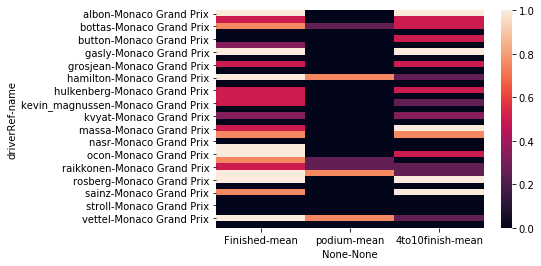

In [169]:
#Let's choose a random Grand Prix to plot
heatmap(df_2018.loc[(slice(None),'Monaco Grand Prix'),:])


## Data Modelling

In [170]:
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, tree
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [171]:
from sklearn.feature_extraction import text  # some text processing tools
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

Earlier on, I didn't really say what I wanted to model, I just started to play around with the data, mostly because I really have no idea what to do with the data...But I tried to keep data that I thought was gonna be useful. 

Ok so let's look at our master data set again.

In [172]:
df_master.head()

,raceId,year,circuitId,name,grid,driverRef,constructorRef,Finished,podium,4to10finish,pitstop_time
0,948,2016,1,Australian Grand Prix,2,rosberg,mercedes,1,1,0,21.531
1,948,2016,1,Australian Grand Prix,1,hamilton,mercedes,1,1,0,21.940
2,948,2016,1,Australian Grand Prix,3,vettel,ferrari,1,1,0,21.339
3,948,2016,1,Australian Grand Prix,8,ricciardo,red_bull,1,0,1,22.245
4,948,2016,1,Australian Grand Prix,6,massa,williams,1,0,1,21.550


Can I create a model to predict a podium finish based off of driver, track, grid position, and constructor???

In this case, predicting a podium finish would be a binary classification model. The answer is either yes(1), or no(0).

Because it is binary classification, I will use BernoulliNB to model the data. 

There's not that much quantitative data, so the accuracy of this model would likely be low, especially because we are missing a lot of factors, such as weather, tyre choice, etc. 

Looking at the data, I don't really think the track will affect podium. Each "Grand Prix" will always hold 3 podium positions, so it's probably a better indication to group the driver+track together because past driver performance on the different tracks varies. For example, some drivers do better on some tracks because it is there "home circuit".

In [173]:
df_grouped = df_master.groupby(['name','driverRef'])
for key, item in df_grouped:
    print(df_grouped.get_group(key), "\n\n")

      raceId  year  circuitId                  name  grid driverRef  \
1379    1030  2019         24  Abu Dhabi Grand Prix     5     albon   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1379       red_bull         1       0            1        22.028   


      raceId  year  circuitId                  name  grid driverRef  \
361      968  2016         24  Abu Dhabi Grand Prix     9    alonso   
702      988  2017         24  Abu Dhabi Grand Prix    11    alonso   
1044    1009  2018         24  Abu Dhabi Grand Prix    15    alonso   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
361         mclaren         1       0            1        22.428  
702         mclaren         0       0            1        22.541  
1044        mclaren         0       0            0        21.726   


      raceId  year  circuitId                  name  grid driverRef  \
372      968  2016         24  Abu Dhabi Grand Prix    11    bottas   
694      988  2017    

      raceId  year  circuitId                  name  grid driverRef  \
711      988  2017         24  Abu Dhabi Grand Prix    15    stroll   
1046    1009  2018         24  Abu Dhabi Grand Prix    20    stroll   
1393    1030  2019         24  Abu Dhabi Grand Prix    12    stroll   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
711        williams         0       0            0        21.613  
1046       williams         0       0            0        22.189  
1393   racing_point         0       0            0        28.842   


      raceId  year  circuitId                  name  grid  driverRef  \
705      988  2017         24  Abu Dhabi Grand Prix    13  vandoorne   
1047    1009  2018         24  Abu Dhabi Grand Prix    18  vandoorne   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
705         mclaren         0       0            0        22.125  
1047        mclaren         0       0            0        22.317   


      raceId  year  cir

      raceId  year  circuitId                   name  grid driverRef  \
726      989  2018          1  Australian Grand Prix    18   leclerc   
1058    1010  2019          1  Australian Grand Prix     5   leclerc   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
726          sauber         1       0            0        22.242  
1058        ferrari         1       0            1        22.306   


     raceId  year  circuitId                   name  grid driverRef  \
4       948  2016          1  Australian Grand Prix     6     massa   
379     969  2017          1  Australian Grand Prix     7     massa   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
4         williams         1       0            1        21.550  
379       williams         1       0            1        21.568   


      raceId  year  circuitId                   name  grid       driverRef  \
9        948  2016          1  Australian Grand Prix     5  max_verstappen   
378     

     raceId  year  circuitId                 name  grid driverRef  \
168     956  2016         70  Austrian Grand Prix    18  ericsson   
528     977  2017         70  Austrian Grand Prix    19  ericsson   
843     997  2018         70  Austrian Grand Prix    20  ericsson   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
168         sauber         0       0            0        22.980  
528         sauber         0       0            0        22.339  
843         sauber         0       0            1        21.519   


      raceId  year  circuitId                 name  grid driverRef  \
844      997  2018         70  Austrian Grand Prix    12     gasly   
1180    1018  2019         70  Austrian Grand Prix     8     gasly   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
844      toro_rosso         0       0            0        22.011  
1180       red_bull         0       0            1        22.239   


      raceId  year  circuitId            

1090        renault         0       0            0        25.498   


     raceId  year  circuitId                name  grid      driverRef  \
43      949  2016          3  Bahrain Grand Prix    19  jolyon_palmer   
426     971  2017          3  Bahrain Grand Prix    10  jolyon_palmer   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
43         renault         0       0            0           NaN  
426        renault         0       0            0        27.466   


      raceId  year  circuitId                name  grid        driverRef  \
32       949  2016          3  Bahrain Grand Prix    22  kevin_magnussen   
432      971  2017          3  Bahrain Grand Prix    20  kevin_magnussen   
738      990  2018          3  Bahrain Grand Prix     6  kevin_magnussen   
1086    1011  2019          3  Bahrain Grand Prix     6  kevin_magnussen   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
32          renault         0       0            0        26.

     raceId  year  circuitId                name  grid driverRef  \
235     960  2016         13  Belgian Grand Prix    17      ocon   
582     980  2017         13  Belgian Grand Prix     9      ocon   
899    1001  2018         13  Belgian Grand Prix     3      ocon   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
235          manor         0       0            0        28.718  
582    force_india         1       0            1        23.364  
899    force_india         1       0            1        19.582   


      raceId  year  circuitId                name  grid driverRef  \
224      960  2016         13  Belgian Grand Prix     6     perez   
590      980  2017         13  Belgian Grand Prix     8     perez   
898     1001  2018         13  Belgian Grand Prix     4     perez   
1239    1022  2019         13  Belgian Grand Prix     7     perez   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
224     force_india         1       0          

     raceId  year  circuitId                  name  grid driverRef  \
338     967  2016         18  Brazilian Grand Prix    21      nasr   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
338         sauber         1       0            1      2008.206   


      raceId  year  circuitId                  name  grid driverRef  \
1361    1029  2019         18  Brazilian Grand Prix    10    norris   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1361        mclaren         1       0            1        23.381   


      raceId  year  circuitId                  name  grid driverRef  \
341      967  2016         18  Brazilian Grand Prix    22      ocon   
691      987  2017         18  Brazilian Grand Prix    10      ocon   
1028    1008  2018         18  Brazilian Grand Prix    18      ocon   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
341           manor         1       0            0      2009.052  
691     force_india      

187        mclaren         0       0            0        30.093   


     raceId  year  circuitId                name  grid driverRef  \
196     957  2016          9  British Grand Prix    22  ericsson   
547     978  2017          9  British Grand Prix    18  ericsson   
872     998  2018          9  British Grand Prix    15  ericsson   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
196         sauber         0       0            0        35.393  
547         sauber         0       0            0        28.825  
872         sauber         0       0            0        28.207   


      raceId  year  circuitId                name  grid driverRef  \
866      998  2018          9  British Grand Prix    14     gasly   
1197    1019  2019          9  British Grand Prix     5     gasly   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
866      toro_rosso         1       0            0        28.676  
1197       red_bull         1       0            

      raceId  year  circuitId                name  grid driverRef  \
181      957  2016          9  British Grand Prix    10     perez   
542      978  2017          9  British Grand Prix     6     perez   
863      998  2018          9  British Grand Prix    12     perez   
1210    1019  2019          9  British Grand Prix    15     perez   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
181     force_india         1       0            1        29.475  
542     force_india         0       0            1        28.942  
863     force_india         1       0            1        28.651  
1210   racing_point         0       0            0        30.264   


      raceId  year  circuitId                name  grid  driverRef  \
180      957  2016          9  British Grand Prix     5  raikkonen   
536      978  2017          9  British Grand Prix     2  raikkonen   
856      998  2018          9  British Grand Prix     3  raikkonen   
1201    1019  2019          9  Briti

      raceId  year  circuitId                 name  grid driverRef  \
132      954  2016          7  Canadian Grand Prix     1  hamilton   
494      975  2017          7  Canadian Grand Prix     1  hamilton   
818      995  2018          7  Canadian Grand Prix     4  hamilton   
1154    1016  2019          7  Canadian Grand Prix     2  hamilton   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
132        mercedes         1       1            0        22.243  
494        mercedes         1       1            0        23.061  
818        mercedes         1       0            1        23.335  
1154       mercedes         1       1            0        23.662   


     raceId  year  circuitId                 name  grid driverRef  \
150     954  2016          7  Canadian Grand Prix    19  haryanto   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
150          manor         0       0            0        29.732   


      raceId  year  circuitId        

      raceId  year  circuitId                 name  grid driverRef  \
133      954  2016          7  Canadian Grand Prix     3    vettel   
497      975  2017          7  Canadian Grand Prix     2    vettel   
814      995  2018          7  Canadian Grand Prix     1    vettel   
1155    1016  2019          7  Canadian Grand Prix     1    vettel   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
133         ferrari         1       1            0        22.597  
497         ferrari         1       0            1        31.596  
814         ferrari         1       1            0        23.529  
1155        ferrari         1       1            0        23.782   


     raceId  year  circuitId                 name  grid driverRef  \
148     954  2016          7  Canadian Grand Prix    17  wehrlein   
508     975  2017          7  Canadian Grand Prix    20  wehrlein   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
148          manor         0       0 

      raceId  year  circuitId                name  grid driverRef  \
1110    1012  2019         17  Chinese Grand Prix    18    kubica   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1110       williams         0       0            0        32.627   


      raceId  year  circuitId                name  grid driverRef  \
46       950  2016         17  Chinese Grand Prix     6     kvyat   
410      970  2017         17  Chinese Grand Prix     9     kvyat   
1112    1012  2019         17  Chinese Grand Prix    11     kvyat   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
46         red_bull         1       1            0        24.084  
410      toro_rosso         0       0            0        24.016  
1112     toro_rosso         0       0            0        17.257   


      raceId  year  circuitId                name  grid driverRef  \
772      991  2018         17  Chinese Grand Prix    19   leclerc   
1098    1012  2019         17  Chinese

     raceId  year  circuitId                  name  grid driverRef  \
571     979  2017         11  Hungarian Grand Prix    19     resta   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
571       williams         0       0            0        22.399   


      raceId  year  circuitId                  name  grid  driverRef  \
200      958  2016         11  Hungarian Grand Prix     3  ricciardo   
573      979  2017         11  Hungarian Grand Prix     6  ricciardo   
877     1000  2018         11  Hungarian Grand Prix    12  ricciardo   
1227    1021  2019         11  Hungarian Grand Prix    20  ricciardo   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
200        red_bull         1       1            0        22.241  
573        red_bull         0       0            0           NaN  
877        red_bull         1       0            1        21.364  
1227        renault         0       0            0        22.498   


     raceId  year  circui

      raceId  year  circuitId                name  grid        driverRef  \
258      961  2016         14  Italian Grand Prix    21  kevin_magnussen   
604      981  2017         14  Italian Grand Prix     9  kevin_magnussen   
929     1002  2018         14  Italian Grand Prix    11  kevin_magnussen   
1271    1023  2019         14  Italian Grand Prix    11  kevin_magnussen   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
258         renault         0       0            0        24.505  
604            haas         0       0            0        24.384  
929            haas         0       0            0        38.563  
1271           haas         0       0            0        24.400   


      raceId  year  circuitId                name  grid driverRef  \
1270    1023  2019         14  Italian Grand Prix    15    kubica   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1270       williams         0       0            0        31.842   


     

      raceId  year  circuitId                name  grid driverRef  \
244      961  2016         14  Italian Grand Prix     3    vettel   
596      981  2017         14  Italian Grand Prix     6    vettel   
917     1002  2018         14  Italian Grand Prix     2    vettel   
1266    1023  2019         14  Italian Grand Prix     4    vettel   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
244         ferrari         1       1            0        25.472  
596         ferrari         1       1            0        24.307  
917         ferrari         1       0            1        32.219  
1266        ferrari         0       0            0        32.443   


     raceId  year  circuitId                name  grid driverRef  \
261     961  2016         14  Italian Grand Prix    13  wehrlein   
609     981  2017         14  Italian Grand Prix    12  wehrlein   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
261          manor         0       0         

988        mclaren         0       0            0        23.159   


      raceId  year  circuitId                 name  grid driverRef  \
289      964  2016         22  Japanese Grand Prix     6    vettel   
652      984  2017         22  Japanese Grand Prix     2    vettel   
979     1005  2018         22  Japanese Grand Prix     8    vettel   
1315    1026  2019         22  Japanese Grand Prix     1    vettel   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
289         ferrari         1       0            1        23.226  
652         ferrari         0       0            0           NaN  
979         ferrari         1       0            1        22.748  
1315        ferrari         1       1            0        24.032   


     raceId  year  circuitId                 name  grid driverRef  \
307     964  2016         22  Japanese Grand Prix    21  wehrlein   
648     984  2017         22  Japanese Grand Prix    17  wehrlein   

    constructorRef  Finished  podi

     raceId  year  circuitId                name  grid        driverRef  \
973    1004  2018         71  Russian Grand Prix    20  brendon_hartley   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
973     toro_rosso         0       0            0        29.418   


    raceId  year  circuitId                name  grid driverRef  \
75     951  2016         71  Russian Grand Prix    12    button   

   constructorRef  Finished  podium  4to10finish  pitstop_time  
75        mclaren         0       0            1         30.58   


     raceId  year  circuitId                name  grid driverRef  \
79      951  2016         71  Russian Grand Prix    22  ericsson   
448     972  2017         71  Russian Grand Prix    18  ericsson   
966    1004  2018         71  Russian Grand Prix    10  ericsson   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
79          sauber         0       0            0        30.529  
448         sauber         0       0     

      raceId  year  circuitId                name  grid driverRef  \
74       951  2016         71  Russian Grand Prix     6     perez   
439      972  2017         71  Russian Grand Prix     9     perez   
963     1004  2018         71  Russian Grand Prix     8     perez   
1300    1025  2019         71  Russian Grand Prix    11     perez   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
74      force_india         0       0            1        32.800  
439     force_india         1       0            1        29.868  
963     force_india         0       0            1        29.924  
1300   racing_point         1       0            1        30.271   


      raceId  year  circuitId                name  grid  driverRef  \
68       951  2016         71  Russian Grand Prix     3  raikkonen   
436      972  2017         71  Russian Grand Prix     2  raikkonen   
957     1004  2018         71  Russian Grand Prix     4  raikkonen   
1306    1025  2019         71  Russi

      raceId  year  circuitId                  name  grid driverRef  \
266      962  2016         15  Singapore Grand Prix     3  hamilton   
614      982  2017         15  Singapore Grand Prix     5  hamilton   
934     1003  2018         15  Singapore Grand Prix     1  hamilton   
1277    1024  2019         15  Singapore Grand Prix     2  hamilton   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
266        mercedes         1       1            0        24.453  
614        mercedes         1       1            0        30.442  
934        mercedes         1       1            0        28.946  
1277       mercedes         1       0            1        28.930   


      raceId  year  circuitId                  name  grid   driverRef  \
284      962  2016         15  Singapore Grand Prix     8  hulkenberg   
627      982  2017         15  Singapore Grand Prix     7  hulkenberg   
943     1003  2018         15  Singapore Grand Prix    10  hulkenberg   
1282    1024  

      raceId  year  circuitId                  name  grid driverRef  \
621      982  2017         15  Singapore Grand Prix    18    stroll   
947     1003  2018         15  Singapore Grand Prix    20    stroll   
1286    1024  2019         15  Singapore Grand Prix    16    stroll   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
621        williams         1       0            1        37.403  
947        williams         0       0            0        28.767  
1286   racing_point         1       0            0        29.482   


     raceId  year  circuitId                  name  grid  driverRef  \
620     982  2017         15  Singapore Grand Prix     9  vandoorne   
945    1003  2018         15  Singapore Grand Prix    18  vandoorne   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
620        mclaren         1       0            1        31.550  
945        mclaren         0       0            0        30.234   


      raceId  year  circuitId

1118        ferrari         1       0            1        23.646   


     raceId  year  circuitId                name  grid driverRef  \
95      952  2016          4  Spanish Grand Prix    18     massa   
466     973  2017          4  Spanish Grand Prix     9     massa   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
95        williams         1       0            1        21.384  
466       williams         0       0            0        40.612   


      raceId  year  circuitId                name  grid       driverRef  \
88       952  2016          4  Spanish Grand Prix     4  max_verstappen   
472      973  2017          4  Spanish Grand Prix     5  max_verstappen   
776      993  2018          4  Spanish Grand Prix     5  max_verstappen   
1116    1014  2019          4  Spanish Grand Prix     4  max_verstappen   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
88         red_bull         1       1            0        22.369  
472        red

      raceId  year  circuitId                      name  grid driverRef  \
1005    1006  2018         69  United States Grand Prix    19     gasly   
1349    1028  2019         69  United States Grand Prix    10     gasly   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1005     toro_rosso         0       0            0        23.865  
1349     toro_rosso         0       0            0        24.195   


      raceId  year  circuitId                      name  grid   driverRef  \
1347    1028  2019         69  United States Grand Prix    16  giovinazzi   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1347           alfa         0       0            0         25.23   


      raceId  year  circuitId                      name  grid driverRef  \
317      965  2016         69  United States Grand Prix    17  grosjean   
667      985  2017         69  United States Grand Prix    12  grosjean   
1010    1006  2018         69  United States Grand Pr

     raceId  year  circuitId                      name  grid driverRef  \
309     965  2016         69  United States Grand Prix     2   rosberg   

    constructorRef  Finished  podium  4to10finish  pitstop_time  
309       mercedes         1       1            0        23.526   


      raceId  year  circuitId                      name  grid driverRef  \
1350    1028  2019         69  United States Grand Prix    18   russell   

     constructorRef  Finished  podium  4to10finish  pitstop_time  
1350       williams         0       0            0        23.702   


      raceId  year  circuitId                      name  grid driverRef  \
313      965  2016         69  United States Grand Prix    10     sainz   
660      985  2017         69  United States Grand Prix     7     sainz   
1000    1006  2018         69  United States Grand Prix    11     sainz   
1341    1028  2019         69  United States Grand Prix     7     sainz   

     constructorRef  Finished  podium  4to10finish  

Not quite sure how to combine this data... so for now I will not care about track for the purposes of completing this project. 

**Classify Categorical Data**

In [174]:
driver_dummies = pd.get_dummies(df_master.driverRef)
driver_dummies.head()

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,resta,ricciardo,rosberg,russell,sainz,sirotkin,stroll,vandoorne,vettel,wehrlein
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
constructor_dummies = pd.get_dummies(df_master.constructorRef)
constructor_dummies.head()

,alfa,ferrari,force_india,haas,manor,mclaren,mercedes,racing_point,red_bull,renault,sauber,toro_rosso,williams
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [176]:
grid_dummies = pd.get_dummies(df_master.grid)
grid_dummies.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df_model = pd.concat([driver_dummies,constructor_dummies,grid_dummies], axis =1)

In [178]:
fnb = BernoulliNB()
fnb.fit(df_model, df_master['podium'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Let's do some test cases from season 2015 (a season not a part of our data set).

I'm only doing 1 off cases for now, so instead I'm just gonna google some results and see what it outputs. 

In [179]:
df_test = df_model.loc[0:4,:]  # I'm making a template for my test variables
df_test

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# emptying the template so that everything is 0, and I can replace the 1 where I want them to be. 
df_test = df_test.replace(1,0)
df_test.values # checking that everything is 0 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0,

In [181]:
df_test

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here are my test cases: 

2015 - Grid position 1, hamilton, Australian Grand Prix, mercedes (has got podium for all 4 seasons)

2015 - Grid position 6, bottas, Abu Dhabi Grand Prix, williams (has got podium for only half seasons)

2015 - Grid position 9, max_verstappen, Brazilian Grand Prix, toro_rosso (has got podium for only half seasons)

2015 - Grid position 3, vettel, Brazilian Grand Prix, ferrari (has got podium for 1 of the seasons)

2015 - Grid position 8, grosjean, Chinese Grand Prix, ferrari (has never gotten podium)

In [182]:
# putting in the test cases: 

# case 1: 
df_test.loc[0,[1]]= 1
df_test.loc[0,['hamilton']] = 1
df_test.loc[0,['mercedes']] = 1

# # case 2: 
df_test.loc[1,[6]]= 1
df_test.loc[1,['bottas']] = 1
df_test.loc[1,['williams']] = 1

# # case 3: 
df_test.loc[2,[9]]= 1
df_test.loc[2,['max_verstappen']] = 1
df_test.loc[2,['toro_rosso']] = 1

# # case 4: 
df_test.loc[3,[3]]= 1
df_test.loc[3,['vettel']] = 1
df_test.loc[3,['ferrari']] = 1

# # case 5: 
df_test.loc[4,[8]]= 1
df_test.loc[4,['grosjean']] = 1
df_test.loc[4,['mercedes']] = 1


In [183]:
df_test

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
df_test.values

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0,

Case 1: 

In [185]:
case1 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]]
fnb.predict(case1)

array([1])

Correct! Hamilton got podium in 2015

In [186]:
case2 = [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]]
fnb.predict(case2)

array([0])

Correct! Bottas didn't get podium in 2015.

In [187]:
case3 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]]
fnb.predict(case3)

array([0])

Correct! Verstappen didn't get podium in 2015.

In [188]:
case4 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]]
fnb.predict(case4)

array([1])

Not correct :(! Vettel didn't get podium in 2015, but he had a high grid position, so that could be why the model predicted wrong

In [189]:
case5 = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]]
fnb.predict(case5)

array([0])

Correct! Grosjean didn't get podium in 2015.

Let's try the model for someone with a really mid grid position, good track record (aka hamilton or rosberg), but a bad car, like mclaren. 

In [190]:
df_test.loc[0,[10]]= 1
df_test.loc[0,['hamilton']] = 1
df_test.loc[0,['mercedes']] = 1
df_test.values

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0,

In [191]:
case6 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0]]
fnb.predict(case6)

array([1])

## Model Validation

Let's make the 2019 data the test data and the rest train data.

In [192]:
test = df_master.loc[df_master['year']==2019]
test.head()

,raceId,year,circuitId,name,grid,driverRef,constructorRef,Finished,podium,4to10finish,pitstop_time
1054,1010,2019,1,Australian Grand Prix,2,bottas,mercedes,1,1,0,22.014
1055,1010,2019,1,Australian Grand Prix,1,hamilton,mercedes,1,1,0,21.515
1056,1010,2019,1,Australian Grand Prix,4,max_verstappen,red_bull,1,1,0,21.157
1057,1010,2019,1,Australian Grand Prix,3,vettel,ferrari,1,0,1,21.995
1058,1010,2019,1,Australian Grand Prix,5,leclerc,ferrari,1,0,1,22.306


Everything else will be the train data.

In [193]:
train = df_master.loc[df_master['year']!=2019]
train.head()

,raceId,year,circuitId,name,grid,driverRef,constructorRef,Finished,podium,4to10finish,pitstop_time
0,948,2016,1,Australian Grand Prix,2,rosberg,mercedes,1,1,0,21.531
1,948,2016,1,Australian Grand Prix,1,hamilton,mercedes,1,1,0,21.940
2,948,2016,1,Australian Grand Prix,3,vettel,ferrari,1,1,0,21.339
3,948,2016,1,Australian Grand Prix,8,ricciardo,red_bull,1,0,1,22.245
4,948,2016,1,Australian Grand Prix,6,massa,williams,1,0,1,21.550


Now apply the model to the train data. 

In [194]:
driver_dummies_train = pd.get_dummies(train.driverRef)    # encoding each feature we are using 
constructor_dummies_train = pd.get_dummies(train.constructorRef)
grid_dummies_train = pd.get_dummies(train.grid)

In [195]:
# creating the training df
train_encoded = pd.concat([driver_dummies_train,constructor_dummies_train,grid_dummies_train], axis =1) 

In [196]:
fnb = BernoulliNB()  # applying the model 
fnb.fit(train_encoded, train['podium'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Encode the test data.

In [197]:
driver_dummies_test = pd.get_dummies(test.driverRef)    # encoding each feature we are using 
constructor_dummies_test = pd.get_dummies(test.constructorRef)
grid_dummies_test = pd.get_dummies(test.grid)

In [198]:
# creating the test df
test_encoded = pd.concat([driver_dummies_test,constructor_dummies_test,grid_dummies_test], axis =1) 

In [199]:
test_results = fnb.predict(test_encoded)

ValueError: Expected input with 65 features, got 51 instead

What why???? 

In [200]:
train_encoded

,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,hamilton,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1051,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
test_encoded

,albon,bottas,gasly,giovinazzi,grosjean,hamilton,hulkenberg,kevin_magnussen,kubica,kvyat,...,11,12,13,14,15,16,17,18,19,20
1054,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1391,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1392,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Uh oh... seems like we have missing drivers or more drivers than we need, so I have to redo all this and encode the year to make sure all drivers are included in both the test and train data. 

In [202]:
train = df_master.copy()

In [203]:
# repeat the encoding process for all the data again and this time do the year as well 
driver_dummies_train = pd.get_dummies(train.driverRef)    # encoding each feature we are using 
constructor_dummies_train = pd.get_dummies(train.constructorRef)
grid_dummies_train = pd.get_dummies(train.grid)
year_dummies_train = pd.get_dummies(train.year)

In [204]:
train_encoded = pd.concat([driver_dummies_train,constructor_dummies_train,grid_dummies_train,year_dummies_train], 
                          axis =1) 
train_encoded.head()

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,17,18,19,20,21,22,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Ok... let's try to separate the data for 2019.

In [205]:
test_encoded = train_encoded.loc[train_encoded[2019]==1]  # extracting 2019 data for the test set
test_encoded

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,17,18,19,20,21,22,2016,2017,2018,2019
1054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1390,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1391,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1392,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [206]:
train_encoded = train_encoded.loc[train_encoded[2019]==0]  # taking only the data that isn't from 2019
train_encoded

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,17,18,19,20,21,22,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Ok now let's remove the years from both dataframes.

In [207]:
del test_encoded[2016]
del test_encoded[2017]
del test_encoded[2018]
del test_encoded[2019]
del train_encoded[2016]
del train_encoded[2017]
del train_encoded[2018]
del train_encoded[2019]

In [208]:
test_encoded

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,13,14,15,16,17,18,19,20,21,22
1054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1391,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [209]:
train_encoded

,albon,alonso,bottas,brendon_hartley,button,ericsson,gasly,giovinazzi,grosjean,gutierrez,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Yay! Same number of columns. Now let's try again. 

Let's create those orginal test and train data sets so that we have the correct "podium" information.

In [210]:
test = train.loc[train['year']== 2019] 

In [211]:
train = train.loc[train['year']!= 2019] 

Create a model from the training set. 

In [212]:
fnb = BernoulliNB()  # applying the model 
fnb.fit(train_encoded, train['podium'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Now let's try applying the model onto the test set again. 

In [213]:
test_results = fnb.predict(test_encoded)

In [214]:
print(metrics.accuracy_score(test['podium'], test_results))

0.9058823529411765


In [215]:
conf_matrix = metrics.confusion_matrix(test['podium'], test_results)
conf_matrix

array([[259,  30],
       [  2,  49]])

In other words:

|                               |  Actual Podium   |  Actual Not Podium |
|------------------------------:|:----------------:|:------------------:|
| **Predicted Podium**          |         259      |       30           | 
| **Predicted Not Podium**      |            2     |        49          | 


# Conclusions

### Accuracy of the Data

Althought the accuracy score of the model to predict podium finishes was almost 91%, as mentioned previously, this is likely not true due to a number of reasons:

**1. Data Set is small**

I only used 4 seasons for the model, which for any model is really not enough data to be able to get rid of any biases or issues, but it was what we had to work with.

**2. Biased Data Set**

Because we could only use up to the 4 recent seasons, the data was extremely biased. Seasoned drivers, such as Lewis Hamilton, Nico Rosberg, and Sebastian Vettel dominate the podium at almost any race. There are off chances when there are accidents or other incidents when younger, less experienced drivers in average cars make it to the podium. So, it's really not that hard to predict those podium finishes.

**3. What causes a podium finish?**

As mentioned previously, the factors I considered for this model was just not enough. Although driver, car, and grid position are certainly big indicators, if you ask any F1 fan, they can't tell you why somebody wins a podium or not. Is it the car? The driver? The track? Their grid position? Tyre choice? Weather? Collisions? Considering all those factors is simply too much for the scope of this project, 

## Some Insight

Doing this project was really fun and interesting. Although I'm a fan of the sport, I never truly cared so much about the underlying data behind it. Super cool to think that so much data is collected each practice, qualifying session, and race that goes towards engineering the car. 

## Thank you!!

Thank you Sabeer for the last few weeks! I truly learned a lot and found something to apply to some of my passions.